In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

> Dataset: https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

In [2]:
df = pd.read_csv("./Data/music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [3]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

# Cleanup

In [4]:
# Remove unnecessary columns
df_sub = df.drop(["instance_id", "artist_name", "track_name", "obtained_date", "duration_ms"], axis=1)
df_sub.isna().sum()
df_sub = df_sub.dropna()

# Convert genres to numeric values
genres = ["Electronic", "Anime", "Jazz", "Alternative", "Country", "Rap", "Blues", "Rock", "Classical", "Hip-Hop"]
df_sub["music_genre"] = df_sub["music_genre"].replace(genres, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Convert key to numeric values
keys = ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"]
df_sub["key"] = df_sub["key"].replace(keys, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

# Convert mode to numeric values
modes = ["Major", "Minor"]
df_sub["mode"] = df_sub["mode"].replace(modes, [0, 1])

# Dropping tempo NaN rows
df_sub["tempo"] = pd.to_numeric(df_sub["tempo"], errors="coerce")
df_sub = df_sub.dropna()
# df_sub[df_sub["tempo"].isna()]
df_sub = df_sub.reset_index(drop=True)
df_sub

C:\Users\tshar\AppData\Local\Temp\ipykernel_20848\1804351477.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sub["music_genre"] = df_sub["music_genre"].replace(genres, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
C:\Users\tshar\AppData\Local\Temp\ipykernel_20848\1804351477.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sub["key"] = df_sub["key"].replace(keys, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
C:\Users\tshar\AppData\Local\Temp\ipykernel_20848\1804351477.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated 

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,0
1,31.0,0.01270,0.622,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,0
2,28.0,0.00306,0.620,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,0
3,34.0,0.02540,0.774,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,0
4,32.0,0.00465,0.638,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45015,59.0,0.03340,0.913,0.574,0.00000,4,0.119,-7.022,0,0.2980,98.028,0.330,9
45016,72.0,0.15700,0.709,0.362,0.00000,2,0.109,-9.814,0,0.0550,122.043,0.113,9
45017,51.0,0.00597,0.693,0.763,0.00000,5,0.143,-5.443,0,0.1460,131.079,0.395,9
45018,65.0,0.08310,0.782,0.472,0.00000,10,0.106,-5.016,1,0.0441,75.886,0.354,9


# PCA

In [5]:
# Standardize the data
# Seperate out the features and target
X = df_sub.drop(["music_genre"], axis=1)
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=["PC1", "PC2"])
principalDf

,PC1,PC2
0,0.672205,-0.280625
1,0.029319,-0.702843
2,0.966492,-1.973767
3,1.308037,0.251857
4,-0.389027,-1.247777
...,...,...
45015,1.533639,2.212234
45016,0.146095,1.254055
45017,1.497639,0.154588
45018,0.808831,1.843794


In [19]:
# Combine the principal components with the target
# pc_df = pd.concat([principalDf, df_sub[["music_genre"]]], axis=1)
pc_df = df_sub
pc_df

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,1,0.115,-5.201,1,0.0748,100.889,0.759,0
1,31.0,0.01270,0.622,0.890,0.95000,5,0.124,-7.043,1,0.0300,115.002,0.531,0
2,28.0,0.00306,0.620,0.755,0.01180,11,0.534,-4.617,0,0.0345,127.994,0.333,0
3,34.0,0.02540,0.774,0.700,0.00253,4,0.157,-4.498,0,0.2390,128.014,0.270,0
4,32.0,0.00465,0.638,0.587,0.90900,9,0.157,-6.266,0,0.0413,145.036,0.323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45015,59.0,0.03340,0.913,0.574,0.00000,4,0.119,-7.022,0,0.2980,98.028,0.330,9
45016,72.0,0.15700,0.709,0.362,0.00000,2,0.109,-9.814,0,0.0550,122.043,0.113,9
45017,51.0,0.00597,0.693,0.763,0.00000,5,0.143,-5.443,0,0.1460,131.079,0.395,9
45018,65.0,0.08310,0.782,0.472,0.00000,10,0.106,-5.016,1,0.0441,75.886,0.354,9


# Visualization

<Axes: >

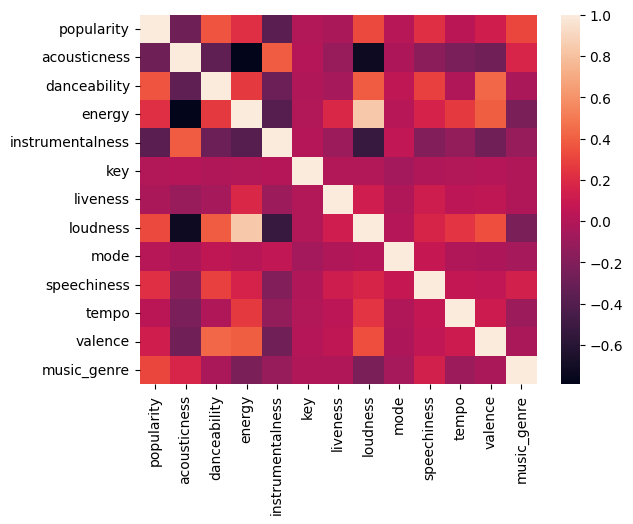

In [31]:
corr_df = pc_df.corr()
sns.heatmap(corr_df)

# sns.scatterplot(data=pc_df, x="loudness", y="music_genre", style="music_genre", markers="+")